In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pandas as pd


plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
#os.chdir('/Users/lynnsorensen/surfdrive/Arousal_asn_export')

In [4]:
tracker = joblib.load('Results/tracker_BinaryEvolvingTask.pkl')


num_rands = [1.125, 1.25, 1.5,2, 3, 4, 5,6, 8, 10, 20, 30, 40]
num_rands = list(reversed(num_rands))
trainings = 10

df = pd.DataFrame({'Num_rand': np.zeros(len(num_rands) * len(tracker['gains']) * trainings),
                   'Gain': np.zeros(len(num_rands) * len(tracker['gains']) * trainings),
                   'Training': np.zeros(len(num_rands) * len(tracker['gains']) * trainings),
                   'BinaryAccuracy': np.zeros(len(num_rands) * len(tracker['gains']) * trainings),
                   'dPrime': np.zeros(len(num_rands) * len(tracker['gains']) * trainings),
                   'criterion': np.zeros(len(num_rands) * len(tracker['gains']) * trainings),
                   'hit-rate': np.zeros(len(num_rands) * len(tracker['gains']) * trainings),
                    'fa-rate': np.zeros(len(num_rands) * len(tracker['gains']) * trainings)
                   })

c = 0
for n, num_rand in enumerate(num_rands):
    for t in range(trainings):
        for i, g in enumerate(tracker['gains']):
            df.loc[c, 'Num_rand'] = num_rand
            df.loc[c, 'Gain'] = g
            df.loc[c, 'Training'] = t
            df.loc[c, 'BinaryAccuracy'] = tracker['random' + str(num_rand)]['Training-' + str(t)]['Test']['binaryAcc'][
                i]
            df.loc[c, 'dPrime'] = tracker['random' + str(num_rand)]['Training-' + str(t)]['Test']['dPrime'][
                i]
            df.loc[c, 'criterion'] = tracker['random' + str(num_rand)]['Training-' + str(t)]['Test']['criterion'][
                i]
            df.loc[c, 'hit-rate'] = tracker['random' + str(num_rand)]['Training-' + str(t)]['Test']['hit-rate'][
                i]
            df.loc[c, 'fa-rate'] = tracker['random' + str(num_rand)]['Training-' + str(t)]['Test']['fa-rate'][
                i]
            c = c + 1


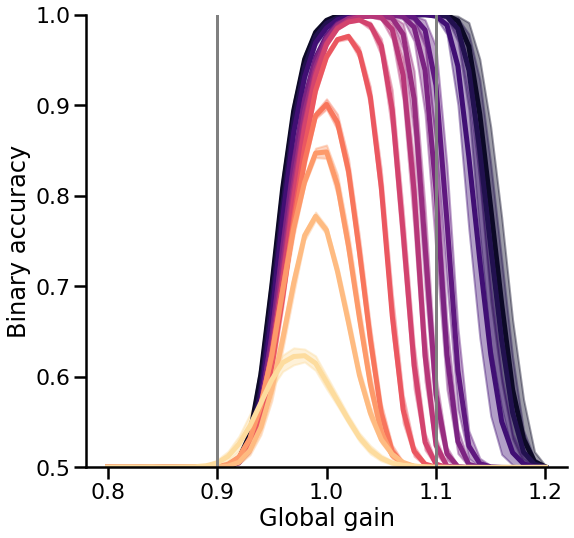

In [5]:
sns.set_context('poster')
colors = sns.color_palette('magma', len(num_rands))

# FIGURE 2C
plt.figure(figsize=(8.5, 8))
ax = sns.lineplot(data=df, x='Gain', y='BinaryAccuracy', palette=colors, hue='Num_rand', hue_order=num_rands,
                  legend=False, linewidth=5, err_kws={'alpha':0.4})

ax.axvline(0.9, c='gray')
ax.axvline(1.1, c='gray')

plt.ylim([0.5, 1])
plt.xticks([0.8, 0.9, 1, 1.1, 1.2])
plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.xlabel('Global gain')
plt.ylabel('Binary accuracy')
sns.despine()
plt.tight_layout()

plt.show()


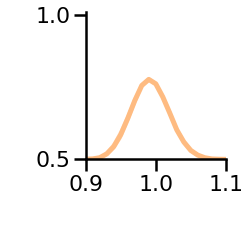

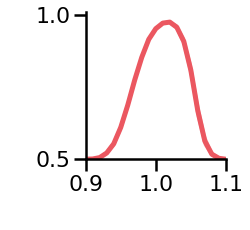

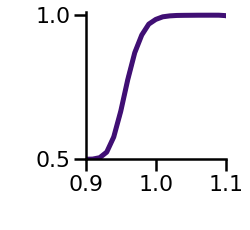

In [6]:
# FIGURE 2D
for num_rand in [1.25, 3, 20]:
    plt.figure(figsize=(4, 3.7))

    ax = sns.lineplot(data=df.loc[df['Num_rand'] == num_rand], x='Gain', y='BinaryAccuracy', palette=colors,
                      hue='Num_rand', hue_order=num_rands,
                      legend=False, linewidth=5, err_kws={'alpha': 0.4})

    plt.xlim([0.9, 1.1])
    plt.ylim([0.5, 1.01])
    plt.xticks([0.9, 1, 1.1])
    plt.yticks([0.5, 1])
    plt.xlabel(' ')
    plt.ylabel(' ')
    sns.despine()
    plt.tight_layout()
    
    plt.show()


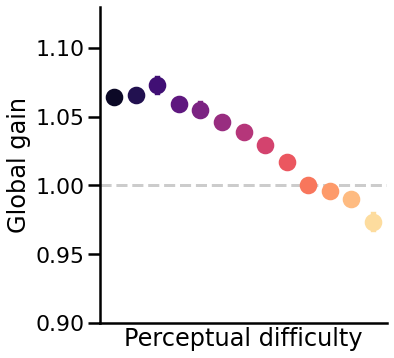

In [7]:
# FIGURE 2E
colors = sns.color_palette('magma_r', len(num_rands))
max_gain = []
max_num_rands = []

for n, num_rand in enumerate(num_rands):
    for t in range(trainings):
        vals = tracker['random' + str(num_rand)]['Training-' + str(t)]['Test']['binaryAcc']
        max_gain.append(tracker['gains'][int(np.median(np.where(vals == vals.max())[0]))])
        max_num_rands.append(num_rand)

plt.figure(figsize=(6, 5.5))
ax = sns.pointplot(x=max_num_rands, y=max_gain, hue=max_num_rands, palette=colors, order=num_rands, join=False,
                   dodge=True, legend=False)

ax.get_legend().remove()
ax.axhline(1, c='gray', alpha=0.4, ls = '--')
ax.set_ylim([0.9, 1.13])
ax.set_yticks([0.9, 0.95, 1, 1.05, 1.1])
ax.set_xticks([])
ax.set_ylabel('Global gain')
ax.set_xlabel('Perceptual difficulty')
sns.despine()
plt.tight_layout()

plt.show()

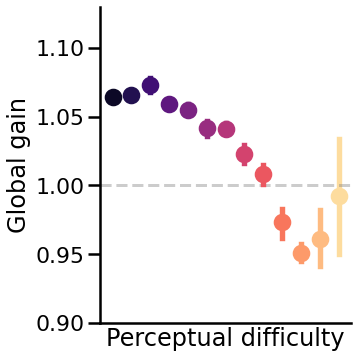

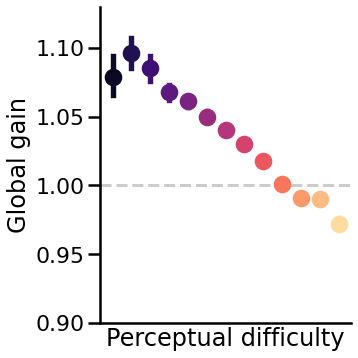

In [9]:
# FIGURE 2F - d' & c
colors = sns.color_palette('magma_r', len(num_rands))

for m in ['dPrime', 'criterion']:
    max_gain = []
    max_num_rands = []

    for n, num_rand in enumerate(num_rands):
        for t in range(trainings):
            vals = tracker['random' + str(num_rand)]['Training-' + str(t)]['Test'][m]
            if m == 'dPrime':
                max_gain.append(tracker['gains'][int(np.median(np.where(vals == vals.max())[0]))])
            elif m == 'criterion':
                max_gain.append(tracker['gains'][int(np.median(np.where(abs(vals) == abs(vals).min())[0]))])

            max_num_rands.append(num_rand)

    plt.figure(figsize=(5.5, 5.5))
    ax = sns.pointplot(x=max_num_rands, y=max_gain, hue=max_num_rands, palette=colors, order=num_rands, join=False,
                       dodge=True, legend=False)

    ax.get_legend().remove()
    ax.axhline(1, c='gray', alpha=0.4, ls = '--')
    ax.set_ylim([0.9, 1.13])
    ax.set_yticks([0.9, 0.95, 1, 1.05, 1.1])
    ax.set_xticks([])
    ax.set_ylabel('Global gain')
    ax.set_xlabel('Perceptual difficulty')
    sns.despine()
    plt.tight_layout()

    plt.show()


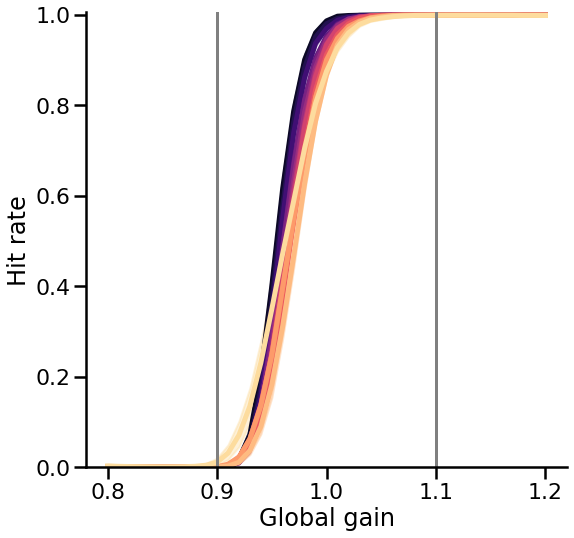

In [10]:
# FIGURE S1A - SDT

plt.figure(figsize=(8.5, 8))
ax = sns.lineplot(data=df, x='Gain', y='hit-rate', palette=sns.color_palette('magma', len(num_rands)),
                  hue='Num_rand', hue_order=num_rands,
                  legend=False, linewidth=5, err_kws={'alpha':0.4})

ax.axvline(0.9, c='gray')
ax.axvline(1.1, c='gray')

plt.ylim([0, 1.005])
plt.xticks([0.8, 0.9, 1, 1.1, 1.2])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.xlabel('Global gain')
plt.ylabel('Hit rate')
sns.despine()
plt.tight_layout()

plt.show()

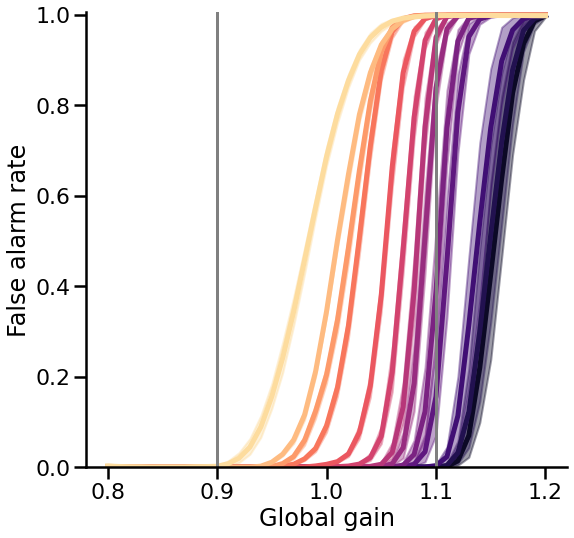

In [11]:
# FIGURE S1B - SDT
plt.figure(figsize=(8.5, 8))
ax = sns.lineplot(data=df, x='Gain', y='fa-rate', palette=sns.color_palette('magma', len(num_rands)),
                  hue='Num_rand', hue_order=num_rands,
                  legend=False, linewidth=5, err_kws={'alpha':0.4})

ax.axvline(0.9, c='gray')
ax.axvline(1.1, c='gray')

plt.ylim([0, 1.005])
plt.xticks([0.8, 0.9, 1, 1.1, 1.2])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.xlabel('Global gain')
plt.ylabel('False alarm rate')
sns.despine()
plt.tight_layout()

plt.show()

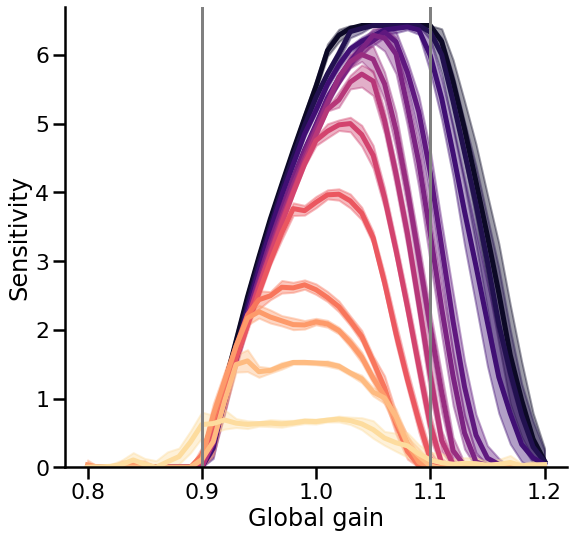

In [12]:
# FIGURE S1C - SDT
plt.figure(figsize=(8.5, 8))
ax = sns.lineplot(data=df, x='Gain', y='dPrime', palette=sns.color_palette('magma', len(num_rands)),
                  hue='Num_rand', hue_order=num_rands,
                  legend=False, linewidth=5, err_kws={'alpha': 0.4})

ax.axvline(0.9, c='gray')
ax.axvline(1.1, c='gray')


plt.ylim([0, 6.7])
plt.xticks([0.8, 0.9, 1, 1.1, 1.2])
plt.yticks([0, 1, 2, 3, 4, 5, 6])
plt.xlabel('Global gain')
plt.ylabel('Sensitivity')
sns.despine()
plt.tight_layout()

plt.show()


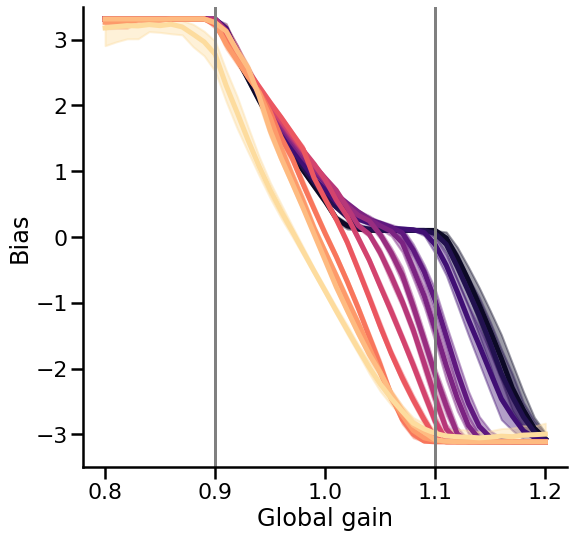

In [13]:
# FIGURE S1D - SDT
plt.figure(figsize=(8.5, 8))
ax = sns.lineplot(data=df, x='Gain', y='criterion', palette=sns.color_palette('magma', len(num_rands)),
                  hue='Num_rand', hue_order=num_rands,
                  legend=False, linewidth=5, err_kws={'alpha': 0.4})

ax.axvline(0.9, c='gray')
ax.axvline(1.1, c='gray')

plt.ylim([-3.5, 3.5])
plt.xticks([0.8, 0.9, 1, 1.1, 1.2])
plt.yticks([-3, -2, -1, 0, 1, 2, 3])
plt.xlabel('Global gain')
plt.ylabel('Bias')
sns.despine()
plt.tight_layout()

plt.show()